In [9]:
"""
Atividade de Estatística Básica

Este trabalho tem como objetivo aplicar conceitos fundamentais de **estatística descritiva** para analisar um conjunto de dados.
Através de medidas como **média, mediana, moda, variância e desvio-padrão**, além de representações gráficas, buscamos compreender melhor o comportamento e a distribuição das informações.

A análise estatística é uma ferramenta essencial para transformar dados brutos em conhecimento útil, permitindo identificar padrões, tendências e possíveis discrepâncias.
Assim, esta atividade servirá como exercício prático para consolidar os conceitos estudados em sala de aula e demonstrar como a estatística pode ser aplicada na resolução de problemas reais.

👨‍💻 Autor: CLEITON HENTGES
📅 Data: [29/08/2025]
💻 Linguagem: Python 3.x
"""


' \nAtividade de Estatística Básica\n\nEste trabalho tem como objetivo aplicar conceitos fundamentais de **estatística descritiva** para analisar um conjunto de dados.  \nAtravés de medidas como **média, mediana, moda, variância e desvio-padrão**, além de representações gráficas, buscamos compreender melhor o comportamento e a distribuição das informações.\n\nA análise estatística é uma ferramenta essencial para transformar dados brutos em conhecimento útil, permitindo identificar padrões, tendências e possíveis discrepâncias.  \nAssim, esta atividade servirá como exercício prático para consolidar os conceitos estudados em sala de aula e demonstrar como a estatística pode ser aplicada na resolução de problemas reais.\n\n👨\u200d💻 Autor: CLEITON HENTGES\n📅 Data: [29/08/2025]\n💻 Linguagem: Python 3.x\n'

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [11]:
# Carregar dataset
df = pd.read_csv('/content/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv (1).csv')

print(" Primeiras linhas do dataset:")
df.head(10)

 Primeiras linhas do dataset:


,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


In [12]:
# 1. Visão geral do dataset

print("Informações iniciais:")
print(df.info(), "\n")

print("Valores nulos por coluna:")
print(df.isnull().sum(), "\n")

print("Tipos de dados das colunas:")
print(df.dtypes, "\n")

print("Estatísticas descritivas:")
print(df.describe(), "\n")

Informações iniciais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1107 non-null   object
 1   Marca           1107 non-null   object
 2   Preco_Normal    1107 non-null   int64 
 3   Preco_Desconto  1107 non-null   int64 
 4   Preco_Anterior  1107 non-null   int64 
 5   Desconto        1107 non-null   int64 
 6   Categoria       1107 non-null   object
dtypes: int64(4), object(3)
memory usage: 60.7+ KB
None 

Valores nulos por coluna:
title             0
Marca             0
Preco_Normal      0
Preco_Desconto    0
Preco_Anterior    0
Desconto          0
Categoria         0
dtype: int64 

Tipos de dados das colunas:
title             object
Marca             object
Preco_Normal       int64
Preco_Desconto     int64
Preco_Anterior     int64
Desconto           int64
Categoria         object
dtype: object 

Estatísticas descr

In [13]:
# Calculando a media e mediana
media_mediana = df.groupby('Categoria')['Preco_Normal'].agg(['mean', 'median']).reset_index()

media_mediana['diferenca'] = media_mediana['mean'] - media_mediana['median']
categorias_com_diferenca = media_mediana[media_mediana['diferenca'].abs() > 0]
print(categorias_com_diferenca)

                    Categoria         mean  median    diferenca
0  belleza-y-cuidado-personal  1783.556485  1569.0   214.556485
1          comidas-preparadas  3095.043478  3290.0  -194.956522
2                  congelados  2108.042553  1519.0   589.042553
3                      frutas  1724.473684  1195.0   529.473684
4        instantaneos-y-sopas   765.491228   439.0   326.491228
5                     lacteos  2385.219239   989.0  1396.219239
6                    verduras  1343.296875  1180.0   163.296875


In [14]:
# Calculando o Desvio Padrão
desvio_padrão = df.groupby('Categoria')['Preco_Normal'].std()
print(desvio_padrão)

ordem = df.groupby("Categoria")["Preco_Normal"].std().sort_values(ascending=False)

# Obetemos o maior desvio padrão em sua categoria lactea.
# Temos a evidencia de muitos outliers inseridos entre os dados, elevando sua categoria media mediana.


Categoria
belleza-y-cuidado-personal    2210.041719
comidas-preparadas            2019.911428
congelados                    2111.539896
frutas                        1639.151114
instantaneos-y-sopas          1170.232869
lacteos                       3925.816164
verduras                      1012.699625
Name: Preco_Normal, dtype: float64


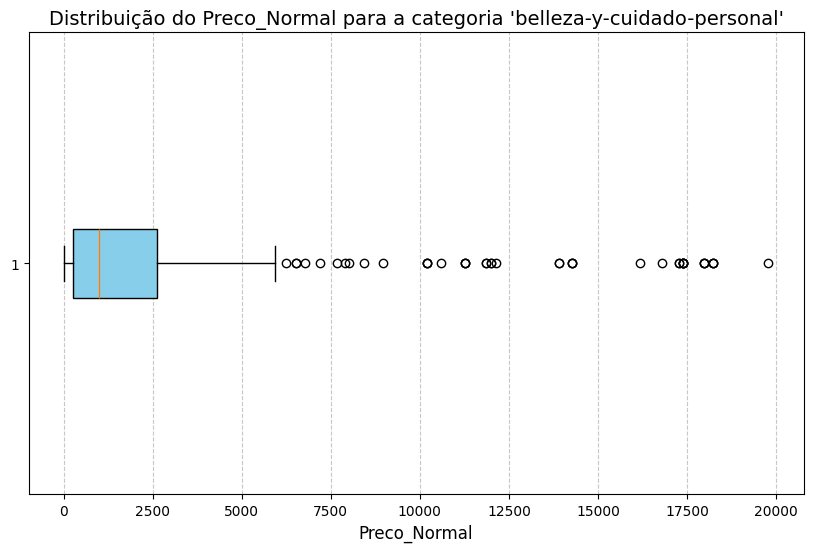

In [15]:
# Plotando grafico de candlestick

filtered_data = df[df['Categoria'] == ordem.index[0]]

plt.figure(figsize=(10, 6))
plt.boxplot(filtered_data["Preco_Normal"], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title(f"Distribuição do Preco_Normal para a categoria '{desvio_padrão.index[0]}'", fontsize=14) # Using the category name in the title
plt.xlabel("Preco_Normal", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?
# Notavel uma concentração de preço dentro 0 - 2500 e uma margem que corre até ±6000. longe disso obtivemos uma variedade de outliers.

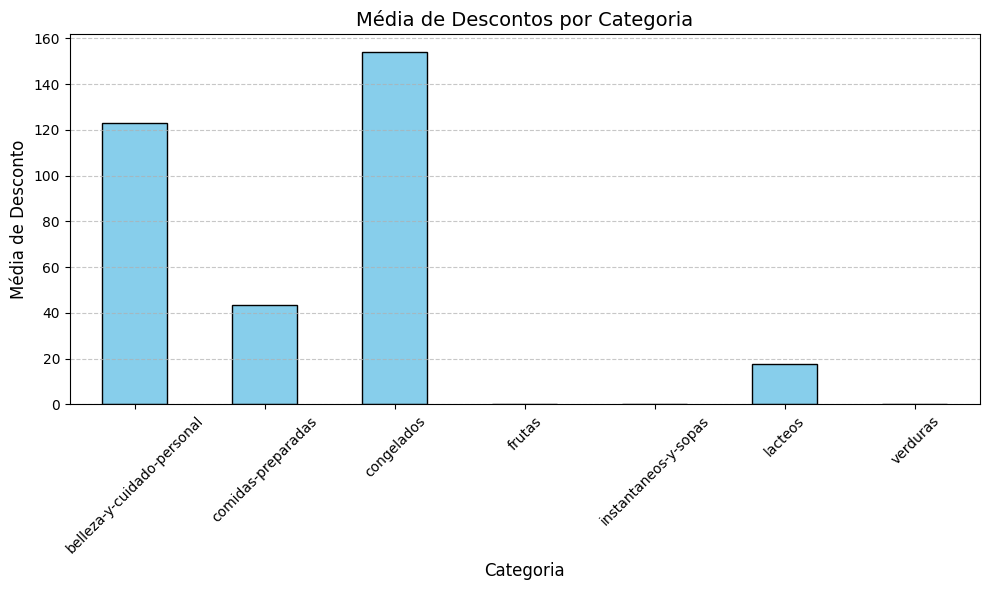

In [16]:
#Plotando grafico de Barras

desconto_médio_por_categoria = df.groupby("Categoria")["Desconto"].mean()

plt.figure(figsize=(10, 6))
desconto_médio_por_categoria .plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Média de Descontos por Categoria", fontsize=14)
plt.xlabel("Categoria", fontsize=12)
plt.ylabel("Média de Desconto", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

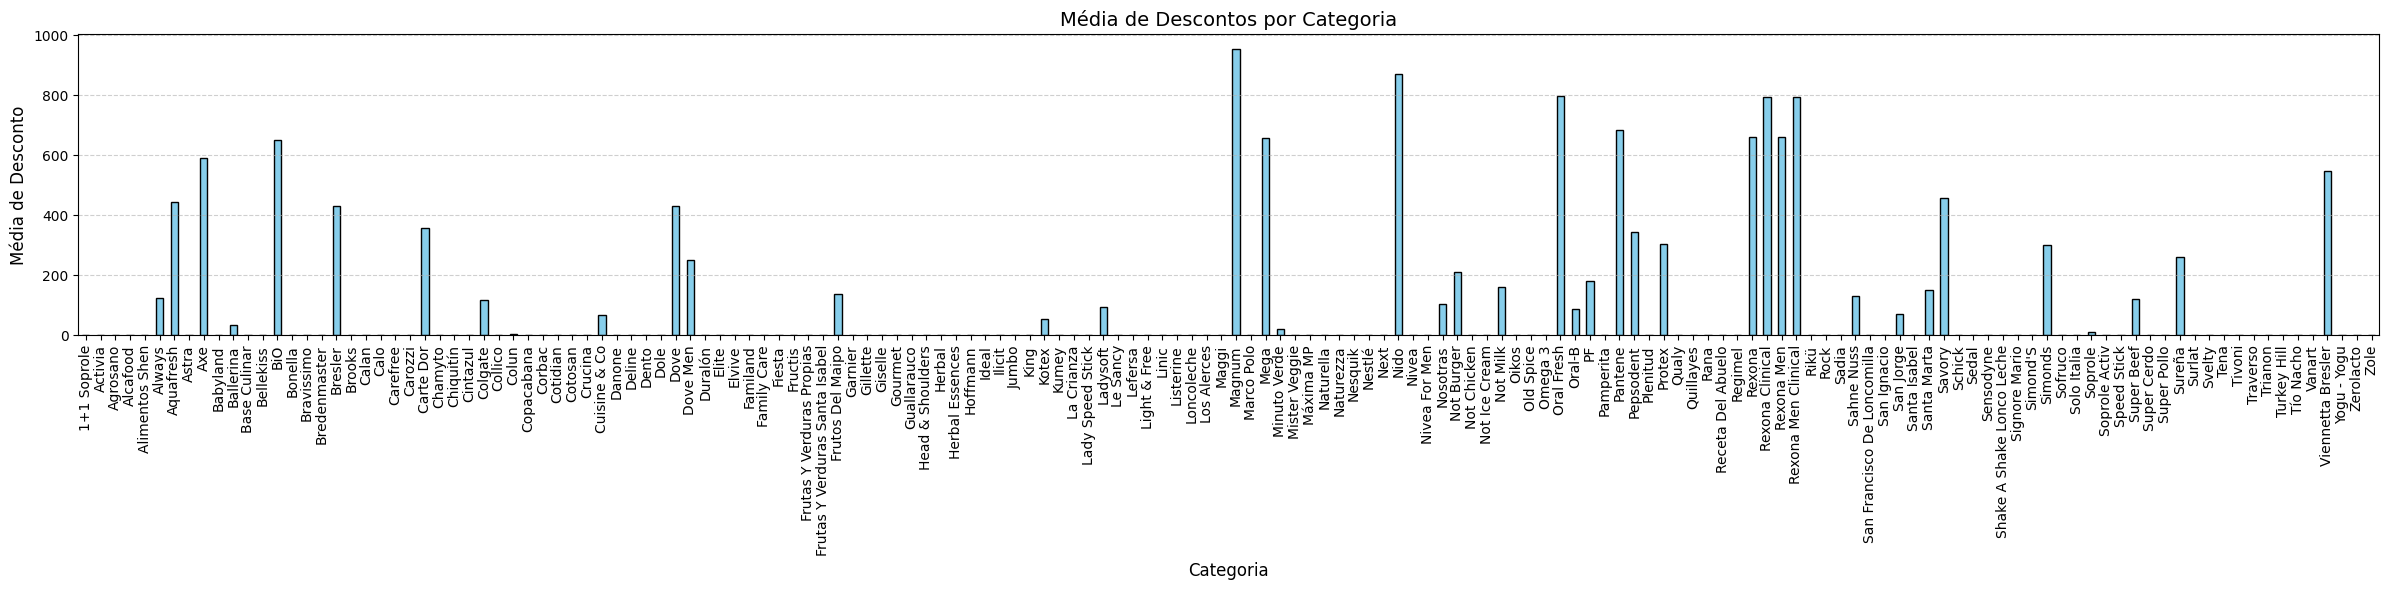

In [17]:
# Plotando grafico de Barras

desconto_médio_por_marca = df.groupby("Marca")["Desconto"].mean()

desconto_médio_por_categoria = df.groupby("Marca")["Desconto"].mean()

plt.figure(figsize=(24, 6))
desconto_médio_por_categoria.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Média de Descontos por Categoria", fontsize=14)
plt.ylabel("Média de Desconto", fontsize=12)
plt.xlabel("Categoria", fontsize=12)
plt.xticks(rotation = 90)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
